In [269]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pathlib import Path
import seaborn as sns 

sns.set_style('darkgrid',)
mpl.rcParams['figure.dpi']= 250

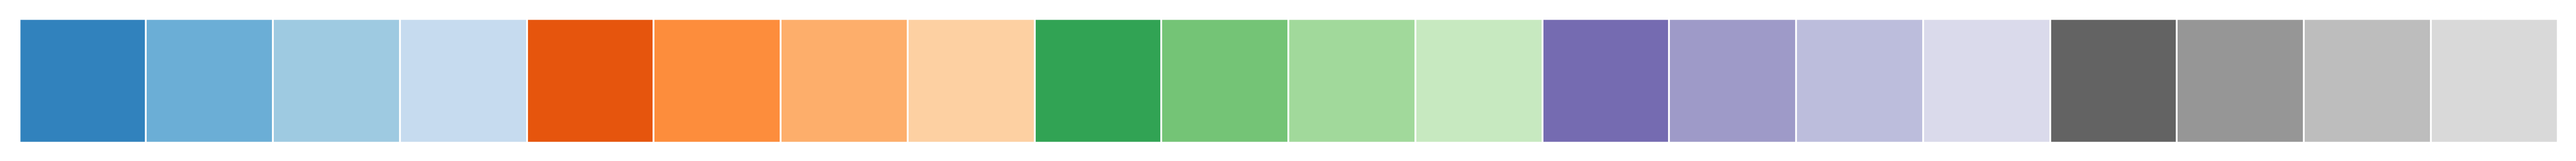

In [270]:
color_scale = sns.color_palette('tab20c').as_hex()
sns.palplot(color_scale)

In [69]:
[color_scale[16]] + color_scale[:9]

['#636363',
 '#3182bd',
 '#6baed6',
 '#9ecae1',
 '#c6dbef',
 '#e6550d',
 '#fd8d3c',
 '#fdae6b',
 '#fdd0a2',
 '#31a354']

In [271]:
sample_dct = {'3_M1_A':'FFPE_3ng_A1',
           '3_M2_A':'FFPE_3ng_A2',
           '3_M3_A':'FFPE_3ng_A3',
           '3_M4_A':'FFPE_3ng_A4',
           '3_repM5_D':'FFPE_3ng_B1',
           '3_repM6_D':'FFPE_3ng_B2',
           '3_repM7_E':'FFPE_3ng_C1',
           '3_repM8_E':'FFPE_3ng_C2',
           '3_repS_B':'FFPE_3ng_S',
           '100_repS_C':'FFPE_100ng_S',
           'FFPE_10ng_1':'FFPE_10ng_1',
           'FFPE_10ng_2':'FFPE_10ng_2',
           'FFPE_50ng':'FFPE_50ng',
           'FFPE_200ng':'FFPE_200ng',
           'FRFZ':'FRFZ'}

In [277]:
batch_dct = {'FFPE_3ng_A1':'FFPE_3ng_A',
           'FFPE_3ng_A2':'FFPE_3ng_A',
           'FFPE_3ng_A3':'FFPE_3ng_A',
           'FFPE_3ng_A4':'FFPE_3ng_A',
           'FFPE_3ng_B1':'FFPE_3ng_B',
           'FFPE_3ng_B2':'FFPE_3ng_B',
           'FFPE_3ng_C1':'FFPE_3ng_C',
           'FFPE_3ng_C2':'FFPE_3ng_C',
           'FFPE_3ng_S':'FFPE_3ng_S',
           'FFPE_100ng_S':'FFPE_100ng_S',
           'FFPE_10ng_1':'FFPE_10ng',
           'FFPE_10ng_2':'FFPE_10ng',
           'FFPE_50ng':'FFPE_50ng',
           'FFPE_200ng':'FFPE_200ng',
           'FRFZ':'FRFZ'}

In [278]:
hs_metrics = pd.read_table('../../data/HSmetrics_plus.txt')

In [279]:
hs_metrics['sample'] = [sample_dct[s] for s in hs_metrics['ID']]
hs_metrics['batch'] = [batch_dct[s] for s in hs_metrics['sample']]

In [280]:
hs_metrics= hs_metrics.sort_values(['panel_type',
                        'input_ng',
                       'sample',],
                       ascending=False)

In [312]:
hs_metrics['Duplicate_Read_Frac'] = 1-hs_metrics['PCT_PF_UQ_READS']

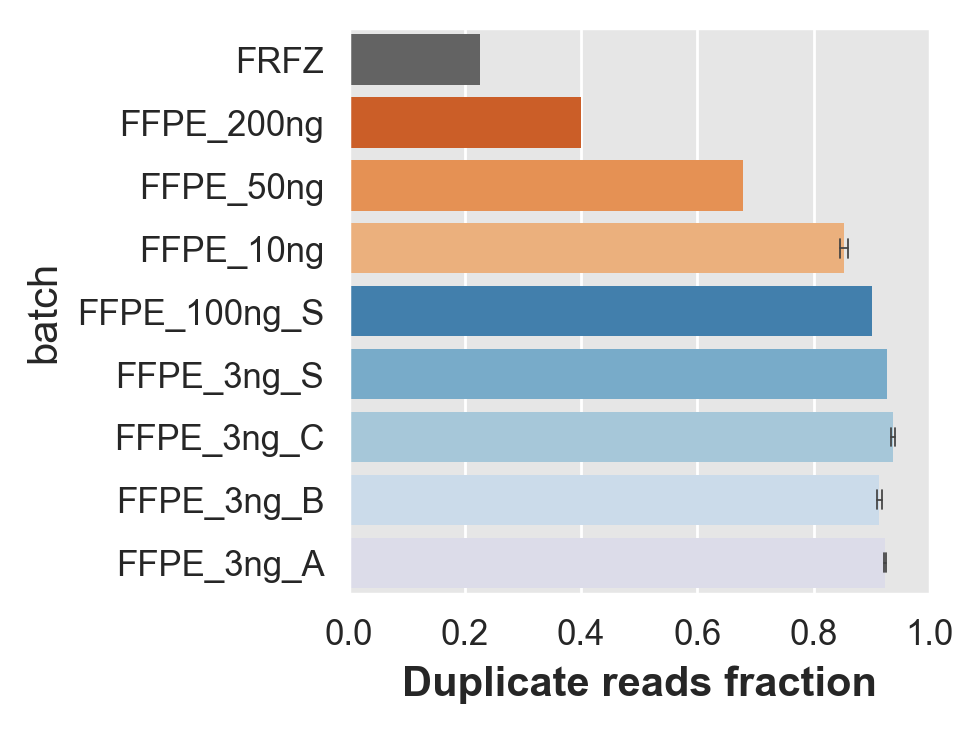

In [323]:
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(y='batch',
            x='Duplicate_Read_Frac',
            data=hs_metrics,
           hue='batch',
           dodge=False,
           palette=[color_scale[16]] + color_scale[4:7] + color_scale[:4] + [color_scale[-5]],
           ax=ax,
           capsize=0.3,
           linewidth=0,
           errwidth=0.5)

ax.legend(bbox_to_anchor=(1.01,0.5)).set_visible(False)
plt.xlim(0,1)
plt.xlabel("Duplicate reads fraction",fontweight='bold')
plt.show()

In [309]:
hs_metrics.columns

Index(['ID', 'panel_type', 'sample_type', 'input_ng', 'N_PCR1', 'capture_plex',
       'GENOME_SIZE', 'BAIT_TERRITORY', 'TARGET_TERRITORY',
       'BAIT_DESIGN_EFFICIENCY', 'TOTAL_READS', 'PF_READS', 'PF_UNIQUE_READS',
       'PCT_PF_READS', 'PCT_PF_UQ_READS', 'PF_UQ_READS_ALIGNED',
       'PCT_PF_UQ_READS_ALIGNED', 'PF_BASES_ALIGNED', 'PF_UQ_BASES_ALIGNED',
       'ON_BAIT_BASES', 'NEAR_BAIT_BASES', 'OFF_BAIT_BASES', 'ON_TARGET_BASES',
       'PCT_SELECTED_BASES', 'PCT_OFF_BAIT', 'ON_BAIT_VS_SELECTED',
       'MEAN_BAIT_COVERAGE', 'MEAN_TARGET_COVERAGE', 'MEDIAN_TARGET_COVERAGE',
       'MAX_TARGET_COVERAGE', 'PCT_USABLE_BASES_ON_BAIT',
       'PCT_USABLE_BASES_ON_TARGET', 'FOLD_ENRICHMENT', 'ZERO_CVG_TARGETS_PCT',
       'PCT_EXC_DUPE', 'PCT_EXC_MAPQ', 'PCT_EXC_BASEQ', 'PCT_EXC_OVERLAP',
       'PCT_EXC_OFF_TARGET', 'FOLD_80_BASE_PENALTY', 'PCT_TARGET_BASES_1X',
       'PCT_TARGET_BASES_2X', 'PCT_TARGET_BASES_10X', 'PCT_TARGET_BASES_20X',
       'PCT_TARGET_BASES_30X', 'PCT_TARGET_BA

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(y='batch',
            x='MEDIAN_TARGET_COVERAGE',
            data=hs_metrics,
           hue='batch',
           dodge=False,
           palette=[color_scale[16]] + color_scale[4:7] + color_scale[:4] + [color_scale[-5]],
           ax=ax,
           capsize=0.3,
           linewidth=0,
           errwidth=0.5)

ax.semilogx()
ax.legend(bbox_to_anchor=(1.01,0.5))
ax.set_ylim(ax.get_ylim()[0] - 0.2,ax.get_ylim()[1] + 0.2)
plt.xlabel("log10(mean coverage)",fontweight='bold')
plt.show()

In [25]:
hs_metrics.sort_values(['panel_type',
                        'input_ng',
                       'sample',],
                       ascending=False)

,ID,panel_type,sample_type,input_ng,N_PCR1,capture_plex,GENOME_SIZE,BAIT_TERRITORY,TARGET_TERRITORY,BAIT_DESIGN_EFFICIENCY,...,HS_PENALTY_20X,HS_PENALTY_30X,HS_PENALTY_40X,HS_PENALTY_50X,HS_PENALTY_100X,AT_DROPOUT,GC_DROPOUT,HET_SNP_SENSITIVITY,HET_SNP_Q,sample
14,FRFZ,Exome,FF,200,14,1,3101804739,54098923,54098923,1,...,4.800830,4.884040,4.976496,5.065253,5.642175,3.778457,4.276718,0.975578,16,FRFZ
12,FFPE_200ng,Exome,FFPE,200,14,1,3101804739,54098923,54098923,1,...,4.237731,4.600828,5.072855,5.704645,-1.000000,8.041060,2.432702,0.987712,19,FFPE_200ng
13,FFPE_50ng,Exome,FFPE,50,14,1,3101804739,54098923,54098923,1,...,4.929482,7.229156,-1.000000,-1.000000,-1.000000,6.275737,2.560687,0.986898,19,FFPE_50ng
11,FFPE_10ng_2,Exome,FFPE,10,14,1,3101804739,54098923,54098923,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,10.675301,0.424149,0.955287,13,FFPE_10ng_2
10,FFPE_10ng_1,Exome,FFPE,10,14,1,3101804739,54098923,54098923,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,9.165412,0.530121,0.959385,14,FFPE_10ng_1
4,100_repS_C,AIO,FFPE,100,10,1,3137161264,731453,731453,1,...,15.242578,16.244529,17.434816,18.872202,64.072994,1.336143,1.827851,0.999492,33,FFPE_100ng_S
5,3_repS_B,AIO,FFPE,3,18,1,3137161264,731453,731453,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.528749,0.629221,0.960004,14,FFPE_3ng_S
0,3_repM8_E,AIO,FFPE,3,14,2,3137161264,731453,731453,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.325316,0.741400,0.955763,14,FFPE_3ng_C2
1,3_repM7_E,AIO,FFPE,3,14,2,3137161264,731453,731453,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.284187,0.936316,0.945293,13,FFPE_3ng_C1
2,3_repM6_D,AIO,FFPE,3,14,2,3137161264,731453,731453,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.569742,0.389272,0.975225,16,FFPE_3ng_B2


In [112]:
pct_target_coverage = ['PCT_TARGET_BASES_1X',
       'PCT_TARGET_BASES_2X', 'PCT_TARGET_BASES_10X', 'PCT_TARGET_BASES_20X',
       'PCT_TARGET_BASES_30X', 'PCT_TARGET_BASES_40X', 'PCT_TARGET_BASES_50X',
       'PCT_TARGET_BASES_100X']

coverage = [1,2,10,20,30,40,50,100]

dict(zip(pct_target_coverage,coverage))

{'PCT_TARGET_BASES_1X': 1,
 'PCT_TARGET_BASES_2X': 2,
 'PCT_TARGET_BASES_10X': 10,
 'PCT_TARGET_BASES_20X': 20,
 'PCT_TARGET_BASES_30X': 30,
 'PCT_TARGET_BASES_40X': 40,
 'PCT_TARGET_BASES_50X': 50,
 'PCT_TARGET_BASES_100X': 100}

In [116]:
hs_metrics[pct_target_coverage]

,PCT_TARGET_BASES_1X,PCT_TARGET_BASES_2X,PCT_TARGET_BASES_10X,PCT_TARGET_BASES_20X,PCT_TARGET_BASES_30X,PCT_TARGET_BASES_40X,PCT_TARGET_BASES_50X,PCT_TARGET_BASES_100X
14,0.983934,0.977312,0.959146,0.948684,0.937891,0.926598,0.914611,0.844342
12,0.990399,0.988934,0.974874,0.946959,0.913034,0.876507,0.836685,0.559854
13,0.990162,0.988527,0.969833,0.922767,0.849569,0.745498,0.610015,0.035137
11,0.986035,0.977712,0.761308,0.255771,0.030193,0.004529,0.001694,0.000058
10,0.986685,0.979619,0.780924,0.261325,0.028689,0.004463,0.001687,0.000057
4,0.999586,0.999426,0.999219,0.998897,0.998131,0.996090,0.992057,0.812766
5,0.998277,0.993905,0.661589,0.147333,0.037945,0.016816,0.009730,0.002822
0,0.998838,0.995505,0.611714,0.100075,0.026599,0.010181,0.005119,0.001390
1,0.997155,0.991613,0.548600,0.079718,0.021783,0.009431,0.004341,0.001764
2,0.999095,0.996857,0.763110,0.189062,0.044779,0.020149,0.009138,0.001060


In [124]:
sum_df = hs_metrics[pct_target_coverage].transpose()
sum_df.columns = list(hs_metrics['ID'])
sum_df['coverage'] = coverage
sum_df

,FRFZ,FFPE_200ng,FFPE_50ng,FFPE_10ng_2,FFPE_10ng_1,100_repS_C,3_repS_B,3_repM8_E,3_repM7_E,3_repM6_D,3_repM5_D,3_M4_A,3_M3_A,3_M2_A,3_M1_A,coverage
PCT_TARGET_BASES_1X,0.983934,0.990399,0.990162,0.986035,0.986685,0.999586,0.998277,0.998838,0.997155,0.999095,0.998179,0.993306,0.995628,0.986580,0.993119,1
PCT_TARGET_BASES_2X,0.977312,0.988934,0.988527,0.977712,0.979619,0.999426,0.993905,0.995505,0.991613,0.996857,0.994846,0.971656,0.981475,0.944007,0.971714,2
PCT_TARGET_BASES_10X,0.959146,0.974874,0.969833,0.761308,0.780924,0.999219,0.661589,0.611714,0.548600,0.763110,0.704685,0.266906,0.342473,0.172007,0.277256,10
PCT_TARGET_BASES_20X,0.948684,0.946959,0.922767,0.255771,0.261325,0.998897,0.147333,0.100075,0.079718,0.189062,0.155303,0.030561,0.036661,0.018716,0.030554,20
PCT_TARGET_BASES_30X,0.937891,0.913034,0.849569,0.030193,0.028689,0.998131,0.037945,0.026599,0.021783,0.044779,0.037565,0.007682,0.010308,0.004654,0.008124,30
PCT_TARGET_BASES_40X,0.926598,0.876507,0.745498,0.004529,0.004463,0.996090,0.016816,0.010181,0.009431,0.020149,0.016458,0.003300,0.002860,0.002253,0.003505,40
PCT_TARGET_BASES_50X,0.914611,0.836685,0.610015,0.001694,0.001687,0.992057,0.009730,0.005119,0.004341,0.009138,0.007197,0.001794,0.001392,0.001245,0.002278,50
PCT_TARGET_BASES_100X,0.844342,0.559854,0.035137,0.000058,0.000057,0.812766,0.002822,0.001390,0.001764,0.001060,0.001281,0.000104,0.000513,0.000386,0.000697,100


In [207]:
lst_ = []
for s in hs_metrics['sample'].unique():
    sample_df = hs_metrics[hs_metrics['sample'] == s]
    sample_df[pct_target_coverage]
    d = pd.DataFrame(columns=['sample','coverage','min_coverage_depth'])
    d['coverage'] = pd.Series(coverage)
    d['sample'] = s
    d['min_coverage_depth'] = sample_df[pct_target_coverage].transpose().values
    d['batch'] = sample_df['batch'].iloc[-1]
    lst_.append(d)

In [206]:
sample_df['batch'].iloc[-1]

'FFPE_3ng_A'

In [208]:
line_df = pd.concat(lst_)

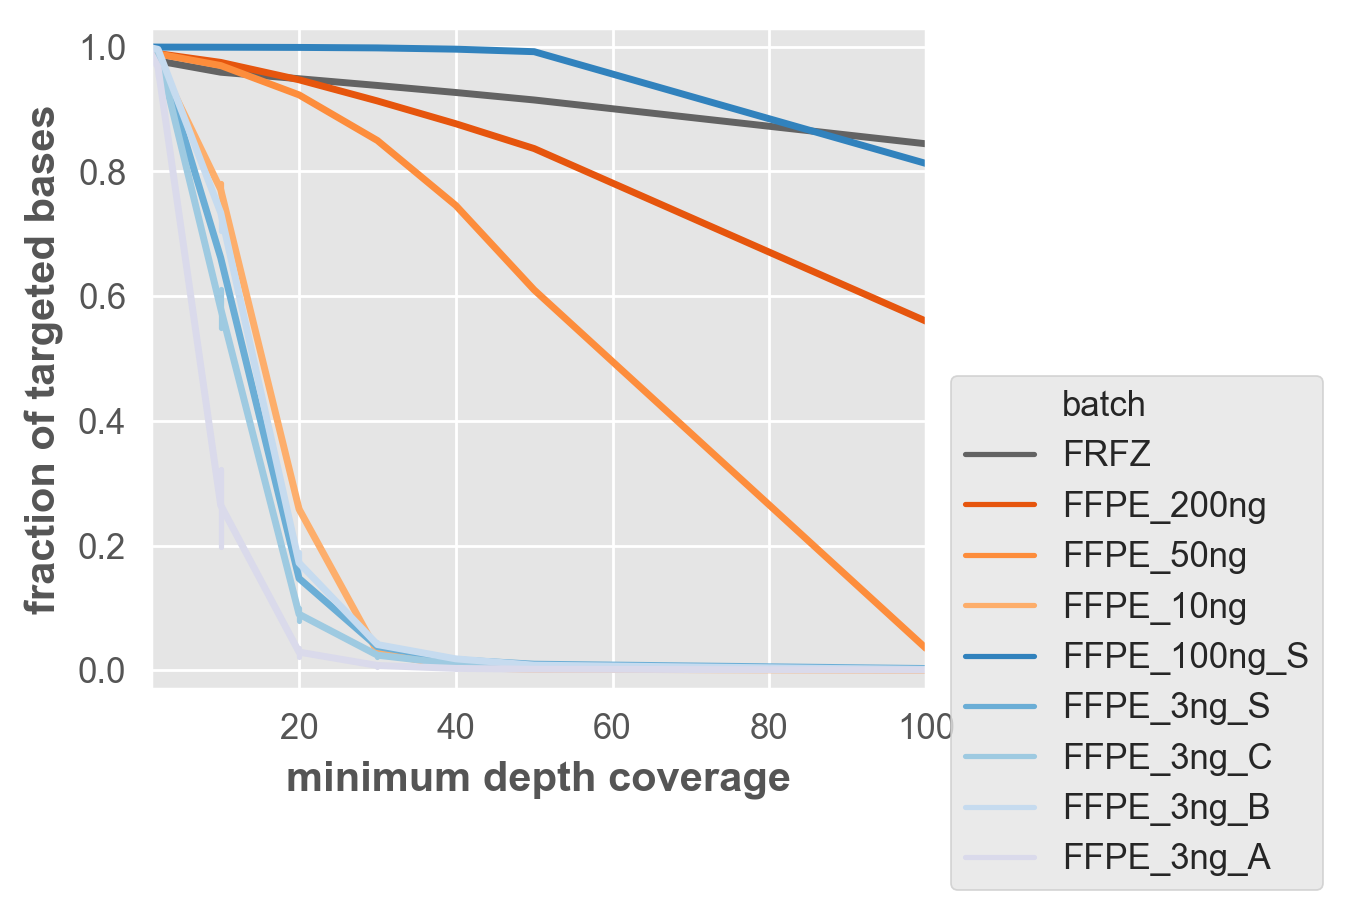

In [307]:
fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
sns.set_style("darkgrid", {"axes.facecolor": ".8"})
plt.style.use('ggplot')
sns.lineplot(x=line_df['coverage'],
             y=line_df['min_coverage_depth'],
             hue=line_df['batch'],
             linewidth=2,
             err_style='bars',
            palette=[color_scale[16]] + color_scale[4:7] + color_scale[:4] + [color_scale[-5]],
            ax=ax)
ax.set_xlabel('minimum depth coverage',fontweight='bold')
ax.set_ylabel('fraction of targeted bases',fontweight='bold')
ax.set_ylim(ax.get_ylim()[0] + 0.02,ax.get_ylim()[1] - 0.02)
ax.set_xlim(ax.get_xlim()[0] + 5,ax.get_xlim()[1] - 5)
ax.legend(bbox_to_anchor=(1.01,0.5))